In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

____

<font size=+3 color=#FFAA00> Classification: Time Series </font>

____

This ICA is part of a three-part series on applications of classification. We will examine:
* images,
* time series,
* sentiment analysis.

In addition to learning about, and comparing, three disparate applications of classification, we will continue to focus on the machine learning workflow and think about your project. 

There are two other goals we want to achieve with these three ICAs:
* we will have a contest among workflows,
* we will document our workflows each day, and improve in the next round.

We will use the [Delphi Method](https://www.rand.org/topics/delphi-method.html) to see if we can create the ultimate ML workflow! The way this will work is that you complete this ICA and put your ML workflow design in [THIS DOCUMENT](https://docs.google.com/document/d/19PrrWMYzKuKvObKHH1cjsY8gqkfNEhOk5hMtDid_bTk/edit?usp=sharing). It is advisable to work on the document as you work through this ICA.

_Important_: Some of you may know ML estimators from other libraries, such as TensorFlow -- do not use them here. Only use `sklearn` so that we can share results among **all** of your classmates. 

<font size=+1 color=#00FFAA> Interlude on Projects </font> 

The topic of your project will be chosen by you. Now is the time to be thinking about what your project might be. You might already have an idea, from your thesis work, or perhaps an application we cover here triggers an idea for you. As we work through these three examples, compare what we are doing here to what you envision your project to be. 

You will complete a _multlabel_ application in the HW this week. 

One possible idea for your project is to generate your own data. You might already have a dataset from your research; or, you are interested in making a new dataset, perhaps for research or fun. Today's project uses a dataset that was made with mobile devices - it might give you ideas for your project? Let's find out....
_____

_____

<font size=+2 color=#00AAFF> First Step: Delphi Method </font>

The main two goals for today are:
* refine your classification workflow,
* learn how classification can be used with time series data.


<font size=+1 color=#00FFAA> Refine Your Workflow </font>

Access our Delphi document and read the comments from the previous ICA. Discuss the workflow you used last time and, based on what you see from the document, design an improved workflow. 

Once you have completed your discussion and have your new design, describe the steps in a markdown cell.  It is important that all steps from IDA through metrics/analysis are included. Mark steps that might be optional.

At the end of this ICA, go back into the Delphi document and give your group's absolute best workflow. 

<font size=+1 color=#00FFAA> Time Series </font>

A time series is a set of points assigned to a different time. In simple cases, there is one variable that is ordered along time points that are equally spaced. 

Discuss with your group how you might handle time series data. Can you think of issues that are specific to time series that might not apply to other types of data? We are obviously doing classification of time series: are there any additional issues that might arise (or not) for this use case?  How might you modify your workflow?

Add your group's thoughts to a markdown cell. In your response consider at least these two ideas:
* time series involve continuous functions (e.g., temperature versus time $T(t)$),
* the data has an explicit ordering. 

_____

<font size=+2 color=#00AAFF> Second Step: Creation of the Dataset </font>
____


Take a few moments to [read this paper](https://www.cis.fordham.edu/wisdm/includes/files/sensorKDD-2010.pdf). This is the original source of the [dataset we will use today](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones). Discuss this paper with your group and write a summary of what they did. 

We will encounter many methods for time series later in the semester. The question we have for today is: how they did propose to handle issues with time series data? Pay particular attention to their Section 2.2: _Feature Generation and Data Transformation_.

Take a look at this picture:
![TS_pic](https://tsfresh.readthedocs.io/en/latest/_images/introduction_ts_exa_features.png)

Note that one can take a time series and map the time-varying function to discrete features. In your summary of the paper include a detailed discussion from your group on your thoughts of such an approach.
* when would this work, or not?
* do you think it will work well for this dataset?
* does your group feel like the authors chose good features?
* from the data shown in the paper (e.g., Fig. 2), do you predict that it will be easy to classifiy the different activities?
* how long do you think it took to generate this dataset, and could you do something like this for your project?
* would this approach have worked if we wanted to do forecasting (predicting future values)? 
* what advanatges does this approach have? (e.g., you can grab any standard classifier).

_____

<font size=+2 color=#00AAFF> Third Step: Obtaining the Dataset </font>
____

You will need to get the files that go with this dataset and put them where this code can access them. The code below reads those files in and builds a dataframe with everything in it. Read through the code so that you know what it does and you can modify it if needed. I got the files from [here](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones).

If you think you want to use this dataset later for any reason, such as your project, you might use the code below to create a dataset in the form you want and then save it in your nice form using something like:

`train.to_csv('Your_Directory/train.csv', index=False)`

`test.to_csv('Your_Directory/test.csv', index=False)`

You might want to change the titles of the columns to be shorter and easier to type, for example. 


Ok, let's make a dataframe from the messy set of files from UCI.

In [3]:
features = list()
path = '/mnt/home/liangqi1/Documents/ML_course/handson-ml3/ICA/datasets/'
with open(path+ 'UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

### training

In [4]:
X_train = pd.read_csv(path+'UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]
X_train.columns = [col[0] for col in X_train.columns]
X_train['subject'] = pd.read_csv(path+'UCI HAR Dataset/train/subject_train.txt', header=None)
y_train = pd.read_csv(path+'UCI HAR Dataset/train/y_train.txt', names=['Activity'])
y_train_labels = y_train.replace({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

### testing

In [5]:
X_test = pd.read_csv('/mnt/home/liangqi1/Documents/ML_course/handson-ml3/ICA/datasets/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]
X_test.columns = [col[0] for col in X_test.columns]
X_test['subject'] = pd.read_csv('/mnt/home/liangqi1/Documents/ML_course/handson-ml3/ICA/datasets/UCI HAR Dataset/test/subject_test.txt', header=None)
y_test = pd.read_csv('/mnt/home/liangqi1/Documents/ML_course/handson-ml3/ICA/datasets/UCI HAR Dataset/test/y_test.txt', names=['Activity'])
y_test_labels = y_test.replace({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

In [6]:
# full training df
train = X_train
train['Activity'] = y_train
train['Activity_Name'] = y_train_labels

# full test df
test = X_test
test['Activity'] = y_test
test['Activity_Name'] = y_test_labels

train.head()
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activity_Name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


_____

<font size=+2 color=#00AAFF> Fourth Step: IDA and EDA </font>
____

Examine the data and clean as needed.

At this point, we could simply proceed using standard classification methods since we have mapped the time series problem onto a discrete classification problem. This problem is not so unlike the MNIST problem we did last week at this point.

Do EDA on this dataset. Begin with a conversation with your group on visualizations that would reveal what this dataset is capable of. Here is just one example, but your group should be very creative in its thinking; use everything you know about visualization and statistics. 

In [26]:
train.iloc[:,:8].keys()

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y'],
      dtype='object')

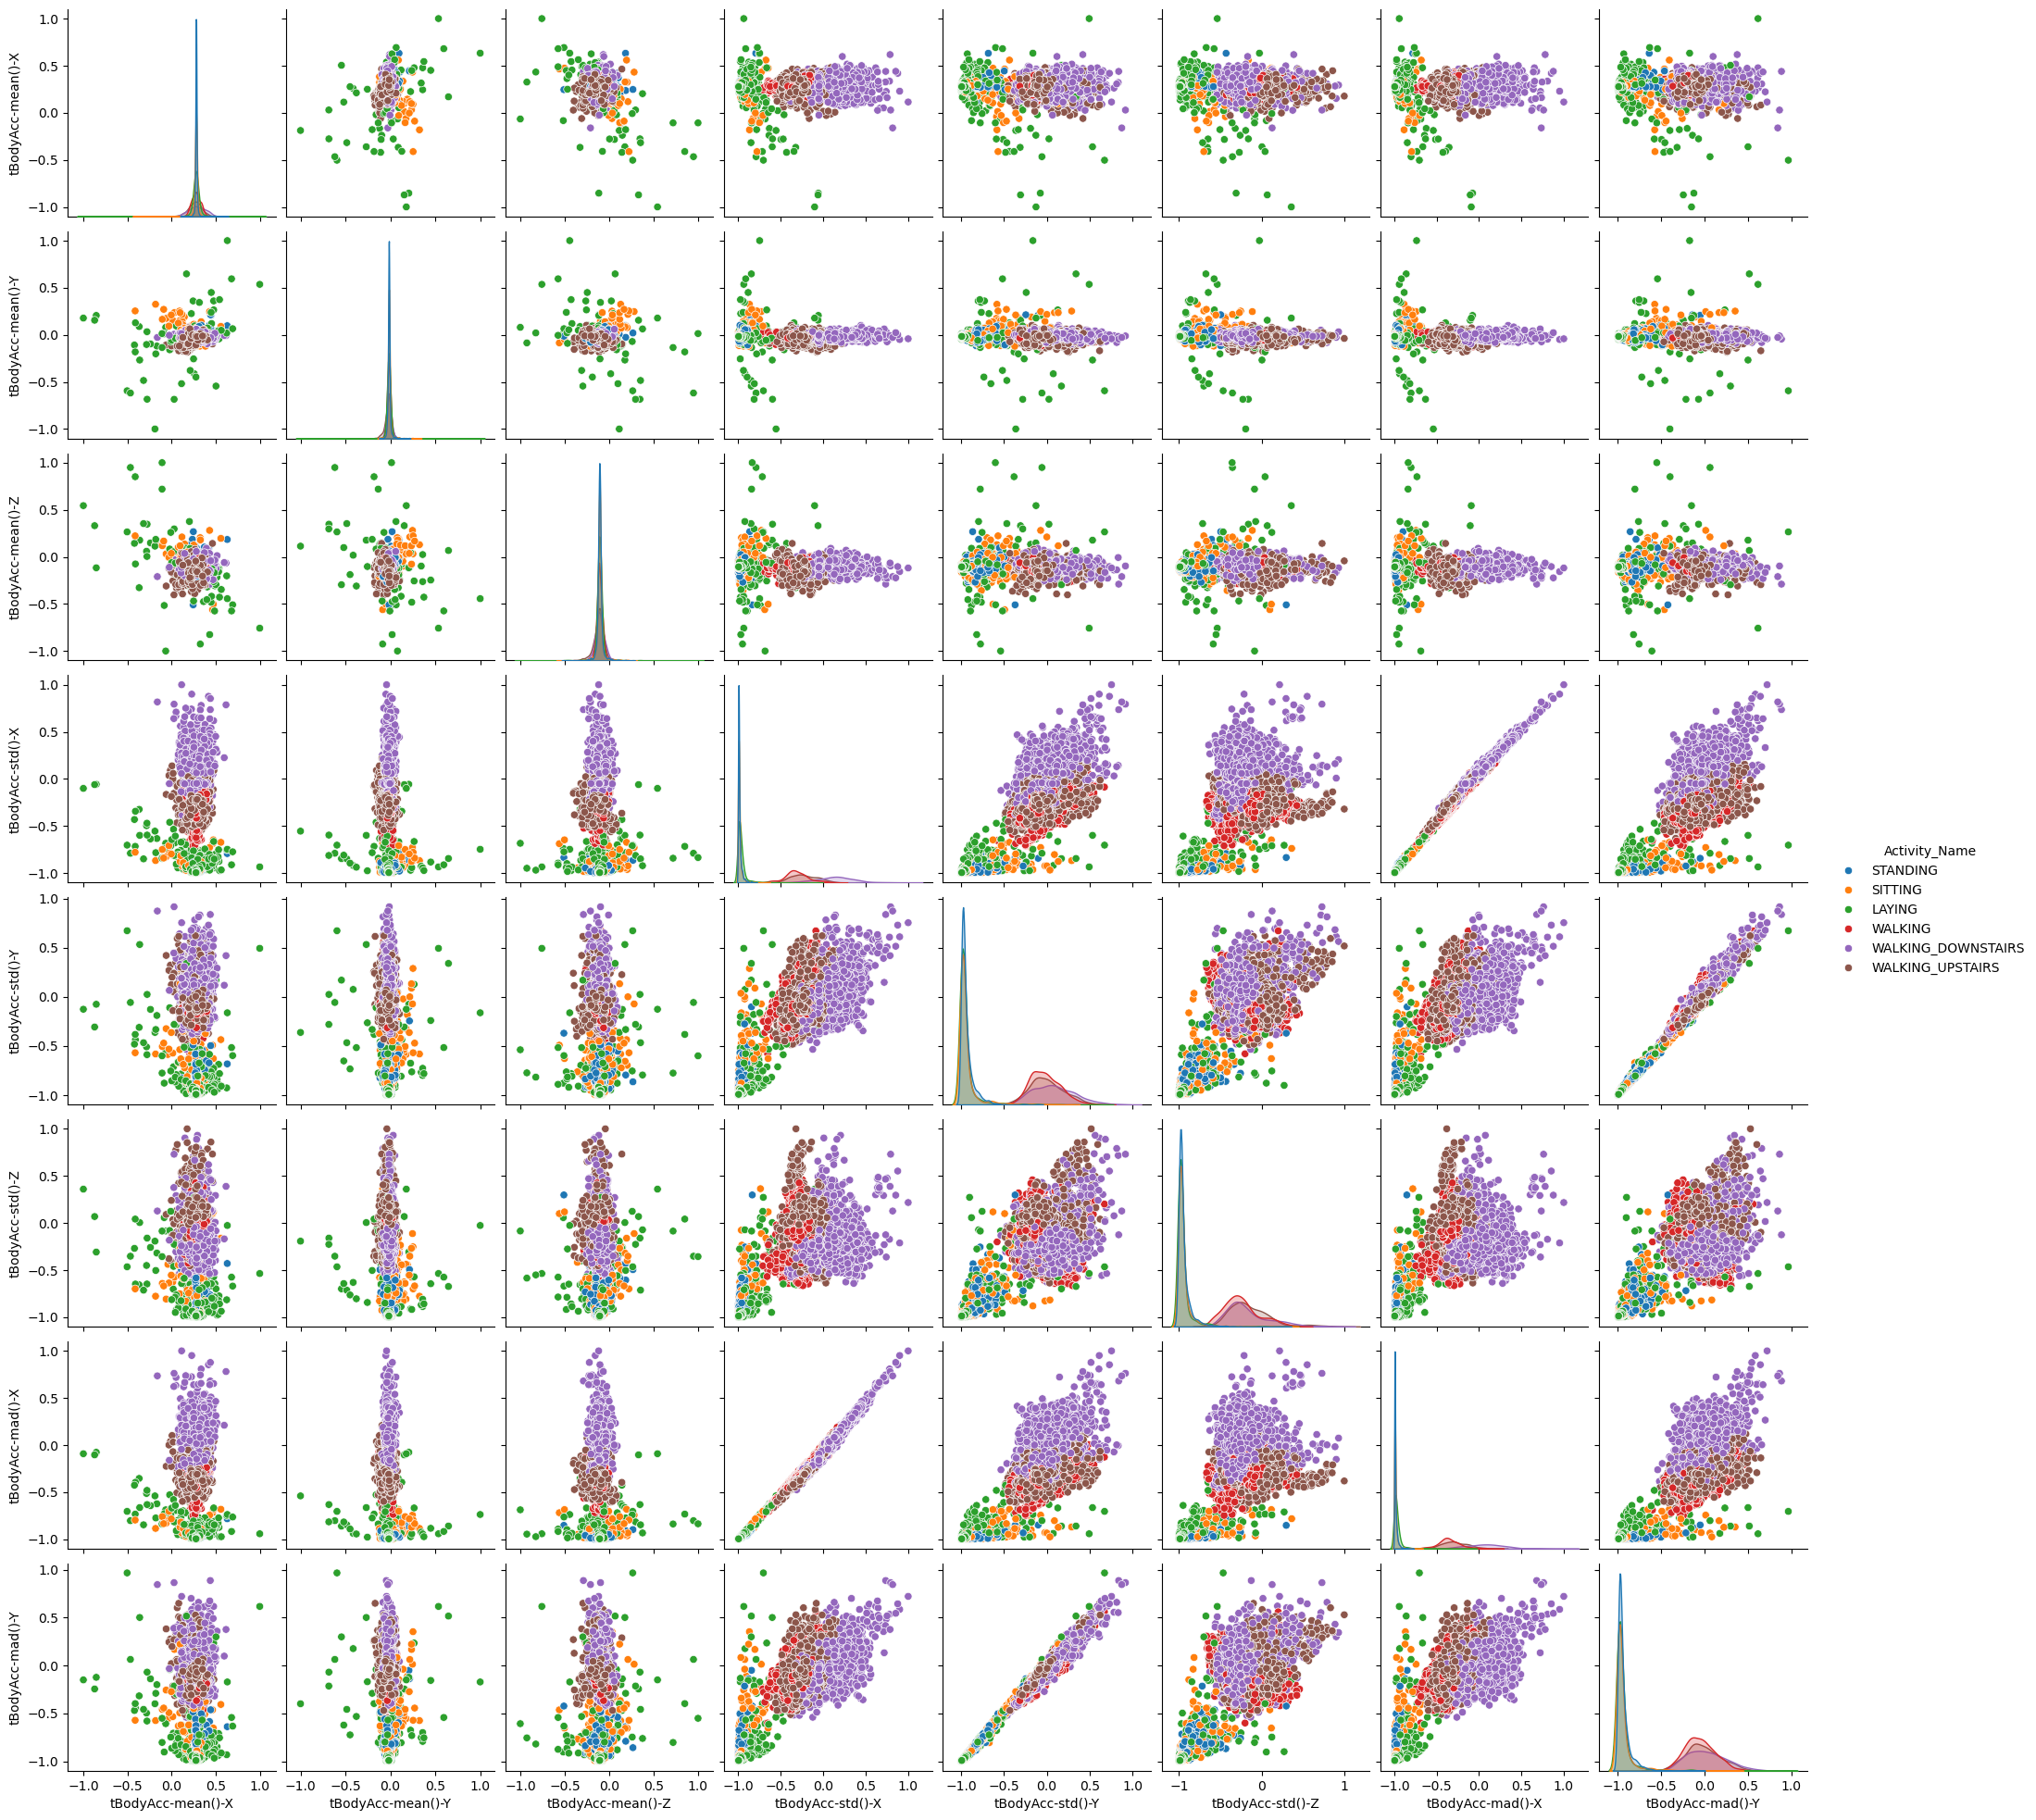

In [16]:
smaller_df = train.iloc[:,:8]
smaller_df["Activity_Name"] = np.ravel(train["Activity_Name"])
sns.pairplot(smaller_df, hue="Activity_Name")

In [17]:

# IDA

# info of the data
print("Info of the dataset:", smaller_df.info())
# from this line we can see there is no missing data

# shape of the dataset
print("Shape of the dataset:", smaller_df.shape)

# first few rows
print("First few rows of the dataset:\n", smaller_df.head())

# summary statistics
print("Summary statistics of the dataset:\n", smaller_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tBodyAcc-mean()-X  7352 non-null   float64
 1   tBodyAcc-mean()-Y  7352 non-null   float64
 2   tBodyAcc-mean()-Z  7352 non-null   float64
 3   tBodyAcc-std()-X   7352 non-null   float64
 4   tBodyAcc-std()-Y   7352 non-null   float64
 5   tBodyAcc-std()-Z   7352 non-null   float64
 6   tBodyAcc-mad()-X   7352 non-null   float64
 7   tBodyAcc-mad()-Y   7352 non-null   float64
 8   Activity_Name      7352 non-null   object 
dtypes: float64(8), object(1)
memory usage: 517.1+ KB
Info of the dataset: None
Shape of the dataset: (7352, 9)
First few rows of the dataset:
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520    

_____

<font size=+2 color=#00AAFF> Fifth Step: Classification </font>
____

Given everything you learned up to this point, perform classifiction on this dataset. Use KNN and vary the size of the input. 

Here is some code to save you some time; change as needed:

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X = smaller_df.drop('Activity_Name', axis=1)  
y = smaller_df['Activity_Name']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_pipeline_new = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5,weights = 'distance',metric = 'l2'))
])

# knn_pipeline_new = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', KNeighborsClassifier(n_neighbors=5))
# ])

knn_pipeline_new.fit(X_train, y_train)

y_pred = knn_pipeline_new.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.73


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'classifier__n_neighbors': np.arange(4, 21), 
              'classifier__metric': ['cityblock', 'l1','l2','manhattan'],
              'classifier__algorithm': ['auto']}

# Create GridSearchCV
grid_search = GridSearchCV(knn_pipeline_new, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)


# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validated Accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test Set Accuracy: {:.2f}".format(test_accuracy))

Best Parameters:  {'classifier__algorithm': 'auto', 'classifier__metric': 'l2', 'classifier__n_neighbors': 8}
Best Cross-Validated Accuracy: 0.71
Test Set Accuracy: 0.72


_____

<font size=+2 color=#00AAFF> Sixth Step: Delphi </font>
____

Based on your new-found experience, update the [Delphi document](https://docs.google.com/document/d/19PrrWMYzKuKvObKHH1cjsY8gqkfNEhOk5hMtDid_bTk/edit?usp=sharing) to include your group's new insights on strategies for classifiers. You might include details (if-then statements) of what you might do differently for images versus time series treated in this way.